In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [101]:
def plot_one_result_pval_var(ax,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None,hwidth=None,label_prefix=""):
    #Getting the result dict
    if clambda!=None:
        if t0ate!=None and hwidth!=None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                                                              hwidth,
                                      )
                    )
        elif t0ate!=None and hwidth==None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
    else:
        #This is not being used now. We directly pass the fname and telambda inside the clambda
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=main_enum,
                                      fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          ate_noise,
                                                                          telambda,
                                  )
                )
    
    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [result_dict[pval][plot_item]["mean"] for pval in pval_list]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label=label_prefix+"ate_noise={}".format(ate_noise),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [80]:
def plot_one_result_ate_pval_pair(ax,plot_item_list,ate_noise_list,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None):
    #Getting the result dict
    #Getting the result dict for all the ate noise also
    all_result_dict=defaultdict(dict)
    for ate_noise in ate_noise_list:
        if clambda!=None:
            if t0ate!=None:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  t0ate,
                                                                                  t1ate,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
            else:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              ate_noise,
                                                                              telambda,
                                      )
                    )

    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [all_result_dict[ate_noise][pval][plot_item]["mean"] for ate_noise,pval in zip(ate_noise_list,pval_list)]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label="ate_noise={}".format("stage1"),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [32]:
def plot_one_result_timeline(ax,plot_item_list,run_list,pval_list,ate_list,fname_pattern,tidx,title):
    #Getting the timeline
    result_dict_timeline = get_all_result_timeline_stage2(
                                            run_list= run_list,
                                            pval_list=pval_list,
                                            ate_list = ate_list,
                                            fname_pattern=fname_pattern
    )
    
#     print(result_dict_timeline)
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        
        #Getting the timeline item
        for pval in pval_list:
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"]
            yerr=[0.0]*len(item_pval_yval_timeline)
            xval = range(len(item_pval_yval_timeline))

            #Plotting the item
            ax[pidx,tidx].errorbar(xval,item_pval_yval_timeline,yerr,label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
            ax[pidx,tidx].set_xlabel("epoch")
            ax[pidx,tidx].set_ylabel(plot_item)
        
#             if "pdelta" not in plot_item or "loss" not in plot_item or "norm" not in plot_item:
#                 ax[pidx,0].set_ylim(0.0,1.1)

            ax[pidx,tidx].legend()
            ax[pidx,tidx].grid(True)
            ax[pidx,tidx].set_title(title)
        
#         if plot_item=="emb_norm":
#             continue
        

## Strategy 2: Ranking experiment (match with absolute TE)

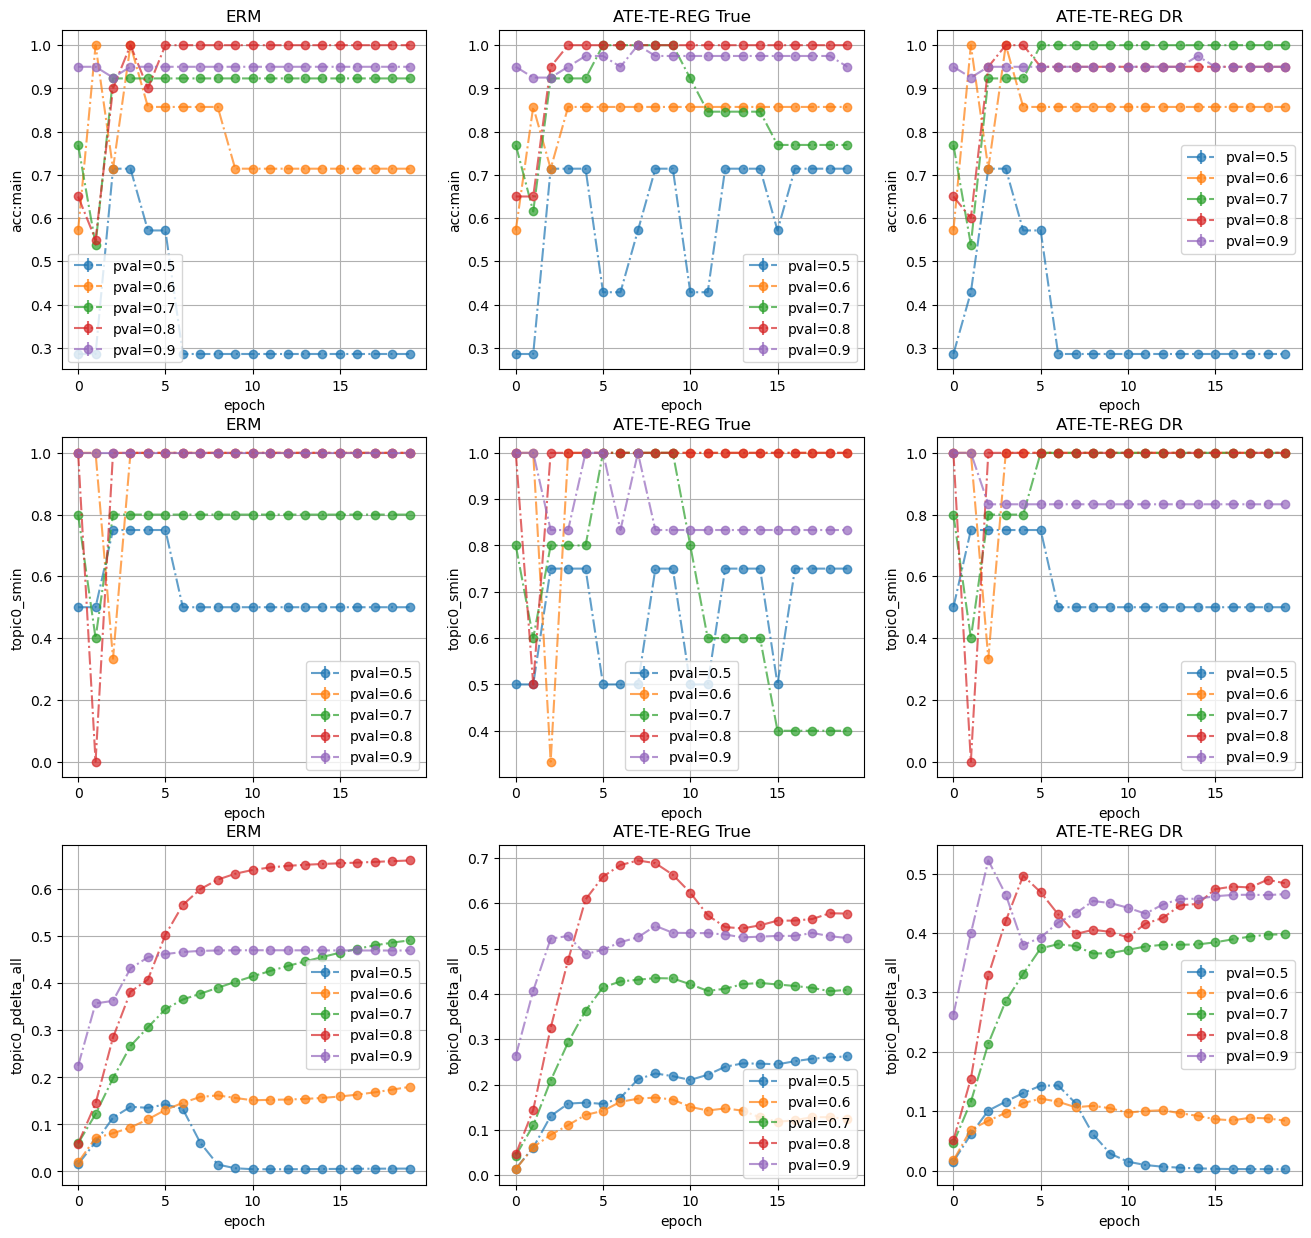

In [48]:
run_list=[0]
pval_list=[0.5,0.6,0.7,0.8,0.9]
ate_list_true = [0.45,0.54,0.58,"0.60",0.69] #correct one
ate_list_dr = [0.05 ,0.25 ,0.45 ,0.4 ,0.6] #DR with correct masking

topic_name="food"
sample=350


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

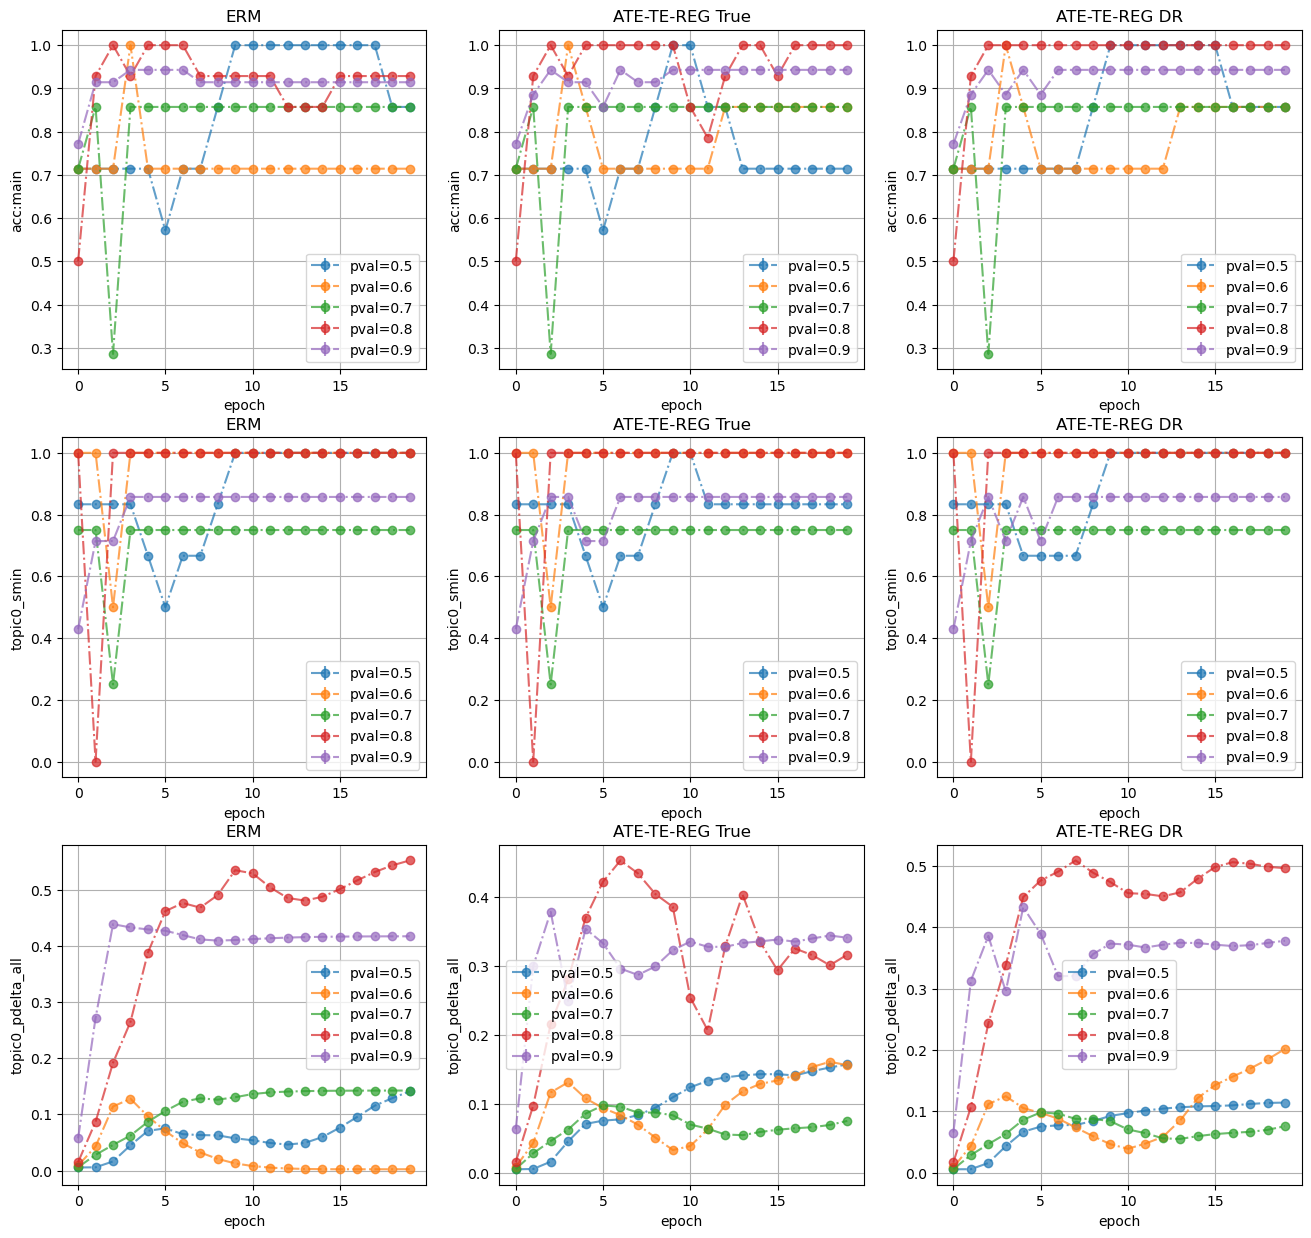

In [46]:
run_list=[0]
pval_list=[0.5,0.6,0.7,0.8,0.9]
ate_list_true = [0.15,0.175,0.2,0.27,0.32] #correct one
ate_list_dr = [0.3 ,0.1 ,0.2 ,0.48 ,0.4] #DR with correct masking


topic_name="service"
sample=200


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

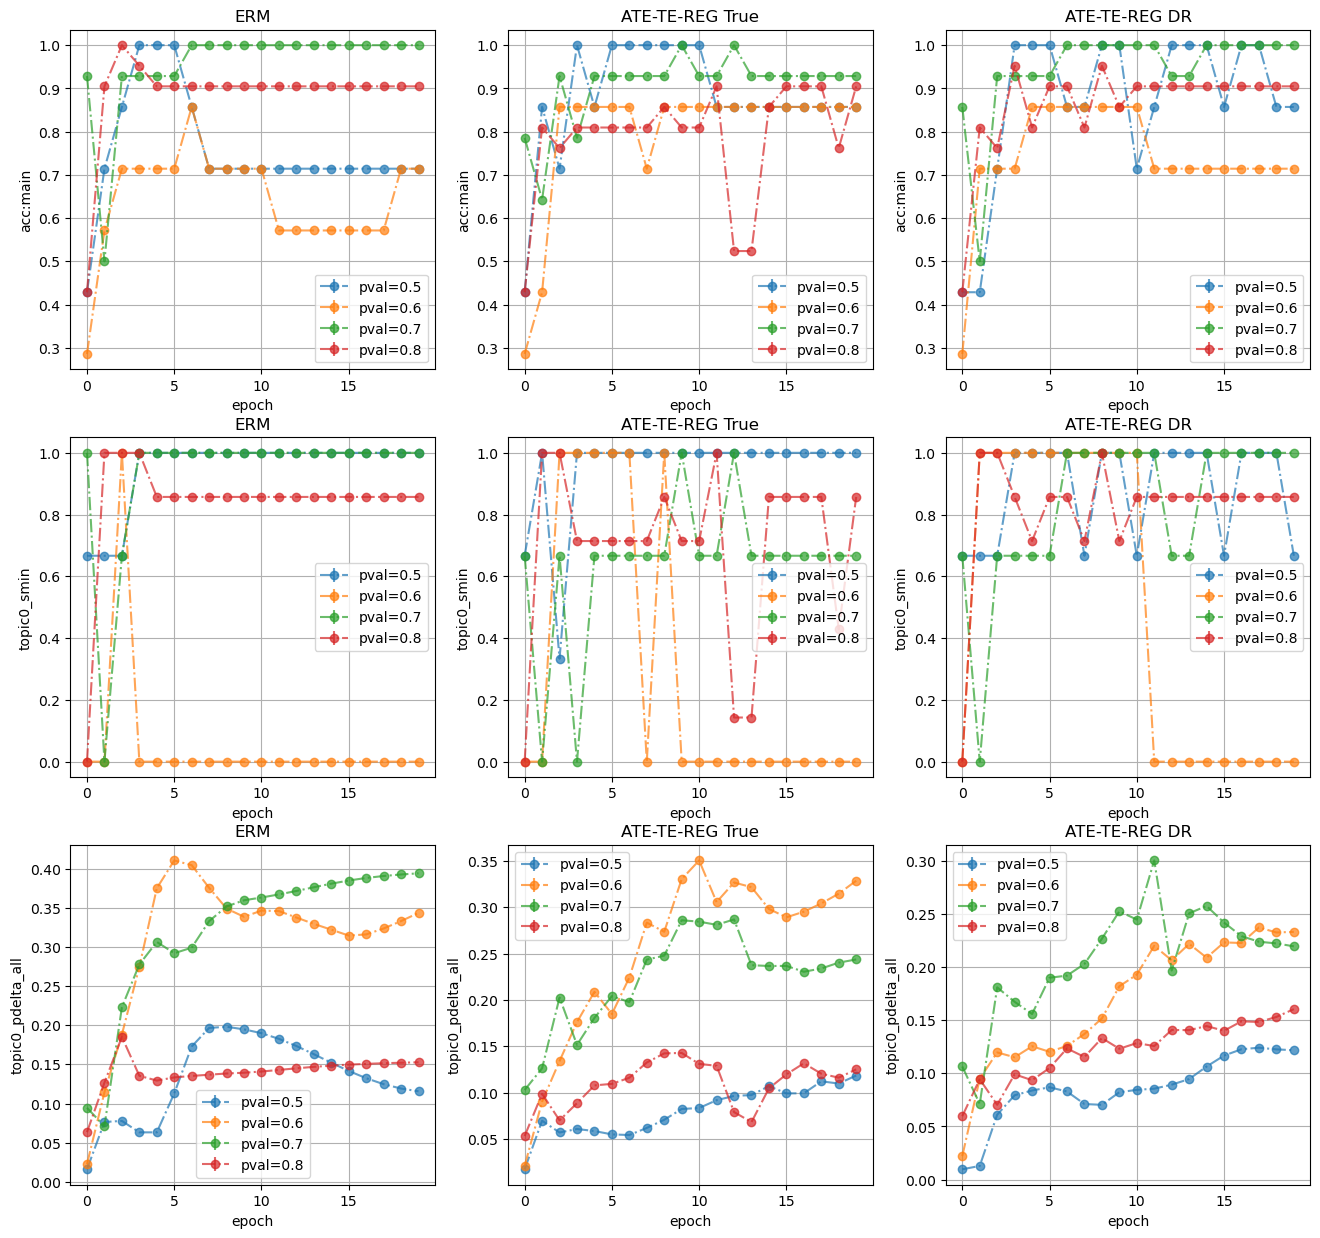

In [44]:
run_list=[0]
pval_list=[0.5,0.6,0.7,0.8]
ate_list_true = [0.15,0.2,0.21,0.22] #correct one
ate_list_dr = [0.62,0.3,0.12,0.25] #DR with correct masking



topic_name="ambiance"
sample=100


telambda = 10
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

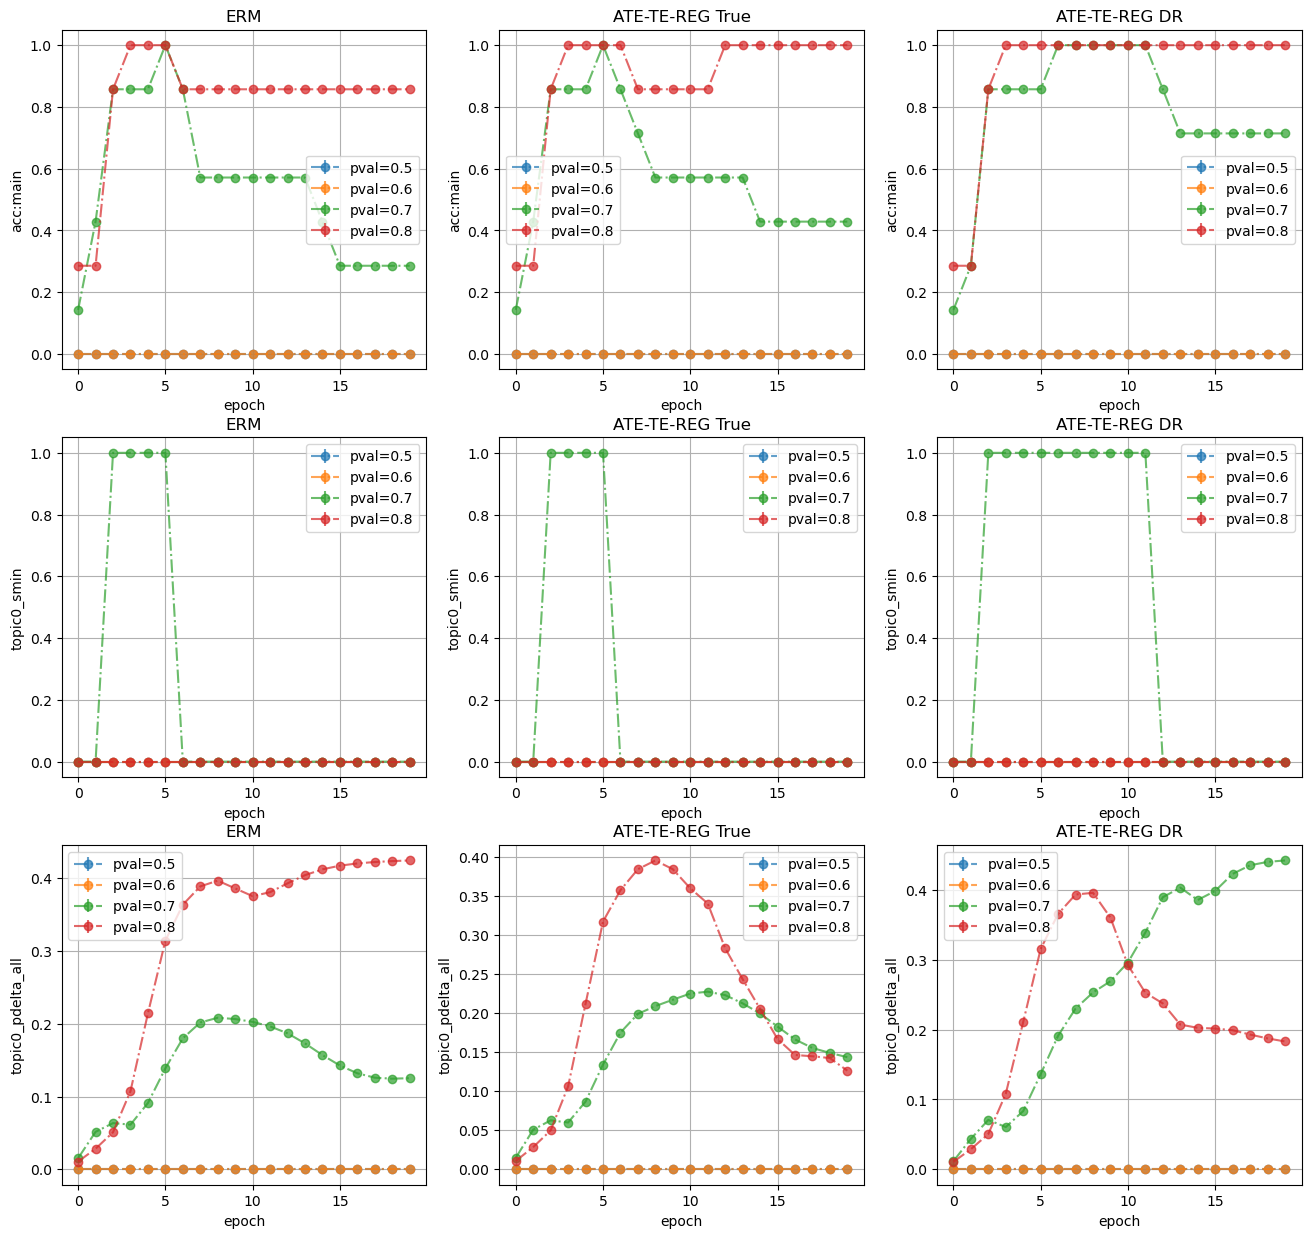

In [49]:
run_list=[0]
pval_list=[0.5,0.6,0.7,0.8]
ate_list_true = [0.1,0.125,0.12,0.2] #correct one
ate_list_dr = [0.0,0.0,0.65,0.25] #DR with correct masking



topic_name="noise"
sample=50


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)